In [78]:
%%html
<!-- Not content, but for better presentation styles -->
<style>
.rise-enabled .rendered_html table.dataframe {
    font-size: 16px;
}
.rendered_html code {
    background: #EFEFEF;
    border: 1px solid #CCC;
    padding: 1px 5px;
    border-radius: 1px;
    font-size: 1.0em;
}
.rise-enabled .fa-times-circle:before,
.rise-enabled .fa-question:before,
.rise-enabled aside.controls {
    opacity: 0.1;
}
.rise-enabled a,
.rise-enabled a:active,
.rise-enabled a:hover,
.rise-enabled a:visited,
.rise-enabled :link {
    text-decoration: none;
    color: #A68910;
}    

.small {
    font-size: 0.8em;
}

.reference {
    height: 100%;
    margin: 8px;
    vertical-align: bottom;
    text-align: left;
    font-size: 0.75em;
}

.container {
    width: 99% !important;
}

.rendered_html {
    font-size: 0.8em;
}
.rendered_html table, .rendered_html th, .rendered_html tr, .rendered_html td {
     font-size: 100%;
}

.rise-enabled {
    #background-color: azure !important;
    font-size: 125% !important;
    background-image: url(./images/Logo_TUD.png);#, linear-gradient(30deg, #7ab8ec, white 75%, white);
    background-size: 50px 50px;
    background-position: right 50px top 50px;
    background-repeat: no-repeat;
    background-origin: content-box;
    background-padding: 50px 0px;
}

.rise-enabled::before{
    font-size: 1.0em;
    content: "Walter de Back  -  Deep Learning for Biomedicine with Keras  -  TU Dresden";
    position: relative;
    top: 50px;
    display: block;
    text-align: center;
    color: #000000;
    #color: #45c8fc;
}

.rotateimg90 {
  -webkit-transform:rotate(90deg);
  -moz-transform: rotate(90deg);
  -ms-transform: rotate(90deg);
  -o-transform: rotate(90deg);
  transform: rotate(90deg);
}
        
</style>

In [2]:
%matplotlib inline
import pylab as plt
import numpy as np

# Deep Learning for Biomedicine with Keras

## Network architectures


<img src="./images/segmentation.png" width="30%" align="right">


[*Walter de Back*](http://walter.deback.net)

Institute for Medical Informatics and Biometry (IMB)  
*"Carl Gustav Carus"* Faculty of Medicine  
TU Dresden

[GitLab repo](https://gitlab.com/wdeback/dl-keras-tutorial)

## Table of contents

- Unsupervised
  - Autoencoders
  
- Image classification
  - AlexNet
  - VGG
  - ResNet
  - Inception
    
- Image segmentation
  - UNet
  - MixedScale Dense Nets
  
- Image embedding
  - Siamese network
  - Triplet networks



- Repository:  
`gitlab.com/wdeback/dl-keras-tutorial`

- Clone repo:  
`git clone git@gitlab.com:wdeback/dl-keras-tutorial.git`

# Autoencoders

<img src="./images/autoencoder.png" width="25%" align="right">

- Unsupervised learning to encode/decode data
  - "feature learning"
  - dimensionality reduction
  - denoising
 
- Loss function
  - difference between input and output

- Historically used to pre-train neural networks

- Stacking layers
  - network re-trained after each new AE 

  
  
  
  
Following example from [F. Chollet's keras blog](https://blog.keras.io/building-autoencoders-in-keras.html)

# Define model 

In [156]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# compile model using pixel-wise crossentropy and adadelta optimizer
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [157]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_33 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_103 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_104 (Dense)            (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


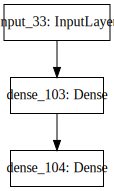

In [158]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(autoencoder).create(prog='dot', format='svg'))


In [159]:
# also create separate encoder / decoder model (used for evaluation only)

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

# Load and preprocess data 

In [160]:
# load data
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()
# normalize data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
# vectorize data (!)
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


# Train AE model

In [161]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 77us/step - loss: 0.3638 - val_loss: 0.2720
Epoch 2/50
60000/60000 [==============================] - 4s 65us/step - loss: 0.2654 - val_loss: 0.2554
Epoch 3/50
60000/60000 [==============================] - 4s 68us/step - loss: 0.2442 - val_loss: 0.2306
Epoch 4/50
60000/60000 [==============================] - 4s 69us/step - loss: 0.2218 - val_loss: 0.2112
Epoch 5/50
60000/60000 [==============================] - 4s 71us/step - loss: 0.2059 - val_loss: 0.1981
Epoch 6/50
60000/60000 [==============================] - 5s 77us/step - loss: 0.1947 - val_loss: 0.1885
Epoch 7/50
60000/60000 [==============================] - 5s 80us/step - loss: 0.1863 - val_loss: 0.1813
Epoch 8/50
60000/60000 [==============================] - 5s 80us/step - loss: 0.1796 - val_loss: 0.1750
Epoch 9/50
60000/60000 [==============================] - 5s 88us/step - loss: 0.1740 - val_loss: 0.1699
Epoch

# Use model

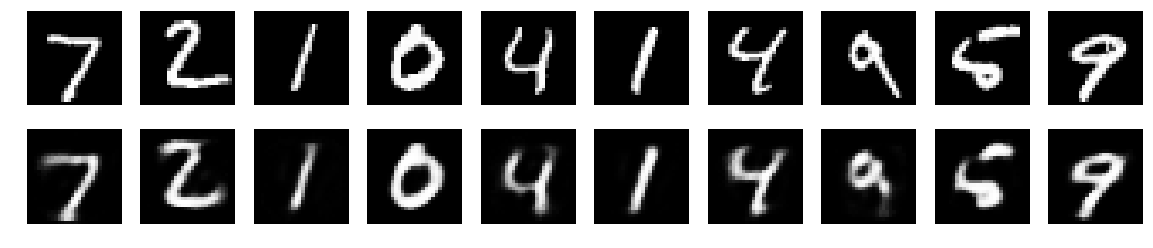

In [162]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
plt.figure(figsize=(20, 4)); n = 10
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.axis('off')
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.axis('off')
plt.show()

# Visualize encoding

Text(0,0.5,'activity of encoding neurons')

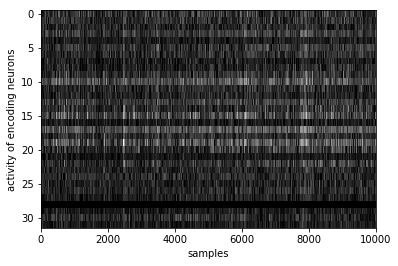

In [152]:
# plot encoded images
plt.imshow(encoded_imgs.T, aspect='auto')
plt.xlabel('samples')
plt.ylabel('activity of encoding neurons')

# Deeper autoencoder

- Let's define a deep autoencoder
  - more stacked layers
  - no need to train layer-by-layer (due to clever weight init)
  - instead, we train it end-to-end
  
- And let's add some regularization
  - weight decay

# Define model

In [79]:
from keras import regularizers

input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

encoder = Model(input_img, encoded)
autoencoder_deep = Model(input_img, decoded)



# Compile and train model

In [55]:
autoencoder_deep.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder_deep.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 6000 samples, validate on 1000 samples
Epoch 1/10
6000/6000 [==============================] - 1s 219us/step - loss: 0.6897 - val_loss: 0.6830
Epoch 2/10
6000/6000 [==============================] - 1s 148us/step - loss: 0.6000 - val_loss: 0.3254
Epoch 3/10
6000/6000 [==============================] - 1s 125us/step - loss: 0.2851 - val_loss: 0.2703
Epoch 4/10
6000/6000 [==============================] - 1s 119us/step - loss: 0.2719 - val_loss: 0.2677
Epoch 5/10
6000/6000 [==============================] - 1s 120us/step - loss: 0.2691 - val_loss: 0.2625
Epoch 6/10
6000/6000 [==============================] - 1s 129us/step - loss: 0.2676 - val_loss: 0.2639
Epoch 7/10
6000/6000 [==============================] - 1s 139us/step - loss: 0.2662 - val_loss: 0.2613
Epoch 8/10
6000/6000 [==============================] - 1s 133us/step - loss: 0.2651 - val_loss: 0.2605
Epoch 9/10
6000/6000 [==============================] - 1s 120us/step - loss: 0.2641 - val_loss: 0.2593
Epoch 10/10
6000

# Show results

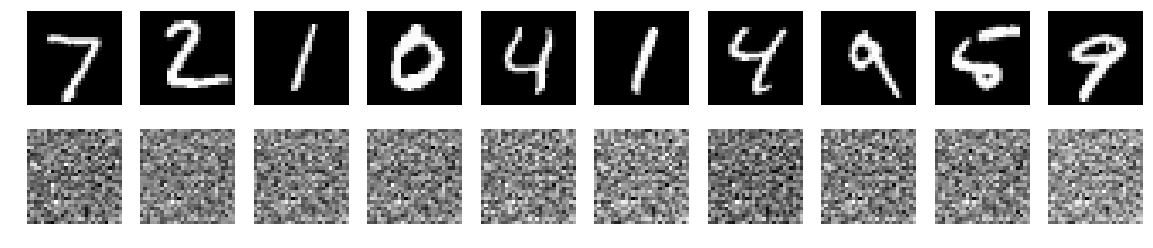

In [153]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs_2 = encoder.predict(x_test)
decoded_imgs_2 = autoencoder_deep.predict(x_test)
plt.figure(figsize=(20, 4)); n = 10
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.axis('off')
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs_2[i].reshape(28, 28))
    plt.gray()
    ax.axis('off')
plt.show()

In [ ]:
# Visualize encoding

Text(0,0.5,'activity of encoding neurons')

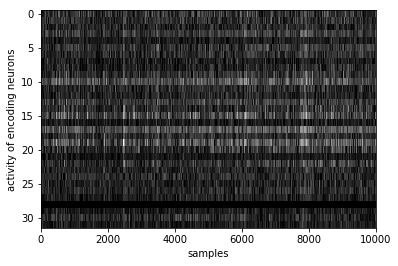

In [154]:
# plot encoded images
plt.imshow(encoded_imgs.T, aspect='auto')
plt.xlabel('samples')
plt.ylabel('activity of encoding neurons')

# Autoencoder

<img src="./images/VAE.png" width="30%" align="right">

- AEs not often used in practice
  - compression / denoising properties not very good and domain-specific

- Variants:
  - Variational autoencoder: learn latent model ($\mu$ and $\sigma$)
     - used in image generation


# Convolutional neural networks


<img src="./images/CNN2.png" width="50%" align="right">

Classical CNNs for image classification consist of:
- Feature extraction part:
  - convolutional layers
    - filters (= convolution kernels)
    - each filter produce a feature map
    - increase 'depth'
  - activation layer
    - nonlinear activation (ReLU)
  - pooling layers
    - subsampling
    - decrease spatial resolution  

- Classification part:
  - fully connected (dense) neural network
  - softmax output layer

- Vectorize (flatten) in between

# Know your classics

<img src="./images/arch1_lenet.png" width="10%" align="left">
<img src="./images/arch2_alexnet.png" width="10%" align="left">
<img src="./images/arch3_vgg.png" width="10%" align="left">
<img src="./images/arch4_googlenet.png" width="10%" align="left">
<img src="./images/arch7_resnet-28-small.png" width="10%" align="left">



# Know your classics

- LeNet, 1998
  - early CNN, complete structure
  - tanh activation
- AlexNet, 2012
  - big improvement on ImageNet
  - ReLU actvation
  - dropout regularization
- VGG, 2014
  - replaced large filters with multiple small filters
  - high memory usage
- GoogLeNet, 2014
  - introduced Inception module: 
    - various filter-sizes: 1x1, 3x3, 5x5
    - 1x1 convolution to combined channels
  - replaced Flatten with GlobalAveragePooling
    - param reduction, input size invariance
- ResNet, 2015
  - resolved degradation problem: decreased performance at higher depth
  - residual connections: added connections that skip layers
- Xception, 2016
  - introduces depthwise separable convolutions: convolution per channel, followed by 1x1 convolutions

    
More info: [CV tricks](http://cv-tricks.com/cnn/understand-resnet-alexnet-vgg-inception/)


# Convolution

<img src="./images/CNN_weight_sharing1.png" width="25%" align="right">

- Connecting image to neural network 
  - Naive approach
    - Pixel-wise connections
    - Spatial structure is lost 


# Convolution

<img src="./images/CNN_weight_sharing1.png" width="25%" align="right">
<img src="./images/CNN_weight_sharing2.png" width="25%" align="right">

- Connecting image to neural network 

  - Naive approach
    - Pixel-wise connections
    - Spatial structure is lost 
  - Convolutional neural nets
    - Local connectivity
    - Weight sharing

# Convolution

<img src="./images/trans_invar.png" width="25%" align="right">

- Connecting image to neural network 

  - Naive approach
    - Fully connected per pixel
    - Spatial structure is lost 
  - Convolutional neural nets
    - Local connectivity
    - Weight sharing
    
  - Reduction of parameters
    - number of filter parameter invariant to image size 
    - typically only 3x3x3 weights per input filter
  - Introduces translational invariance
    - cat can be anywhere in image

# Okay, let's build a CNN
 

<img src="./images/build.webp" width="25%" align="left">



# Imports and parameters 

In [147]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

num_classes = 10

# input image dimensions
img_rows, img_cols = 28, 28

# Get and preprocess data

In [113]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)

# convert class vectors (= index notation) to binary class matrices (= one-hot notation)
print(y_train[:4])
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train[:4]) 


x_train shape: (60000, 28, 28, 1)
[5 0 4 1]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


# Define CNN model
- using sequential API
- only for linearly stacked models

In [119]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_99 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_16 (Dropout)         (None, 128)               0         
__________

# Define CNN model
- using functional API
- support for multiple input/outputs

In [120]:
i = Input(shape=input_shape)
x = Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape)(i)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
o = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=[i], outputs=[o])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_32 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_101 (Dense)            (None, 128)               1179776   
__________

# Train model

- on minibatches

In [122]:
# compile model with loss function and optimizer
## metrics are only for human supervision of learning process
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) 

batch_size = 256
epochs = 2

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          shuffle=True,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
11264/60000 [====>.........................] - ETA: 2:58 - loss: 0.1950 - acc: 0.9442

KeyboardInterrupt: 

# Evaluate accuracy

- on test set

In [123]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.09298350124433637
Test accuracy: 0.9719


# Predict classes

- on test set

In [136]:
num=500
y_pred = model.predict(x_test[:num], verbose=1, batch_size=12)
print('raw output:\n', np.round(y_pred[:4],3))

# convert from one-hot to index notation
Y_pred = np.argmax(y_pred, axis=1) 
print('predicted class:\n', Y_pred[:4])

500/500 [==============================] - 1s 1ms/step
raw output:
 [[0.    0.    0.    0.    0.    0.    0.    1.    0.    0.   ]
 [0.    0.    1.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.994 0.003 0.    0.    0.    0.    0.001 0.001 0.   ]
 [1.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]]
predicted class:
 [7 2 1 0]


In [137]:
def plot_images(images, labels, gt=None):
    # reduce empty dimensions, if any
    images = np.squeeze(images)
    labels = np.squeeze(labels)
    numrows=int(np.ceil(np.sqrt(images.shape[0])))
    fig, axes = plt.subplots(nrows=numrows, ncols=numrows, figsize=(8,8), sharex=True, sharey=True)
    fig.tight_layout()
    axes = axes.flatten()
    for i, ax in enumerate(axes):
        ax.imshow(images[i], cmap=plt.get_cmap('gray_r'))
        ax.set_title('gt = {}'.format(labels[i]), fontsize=18)
        ax.axis('off')
        
        # highlight wrong predictions is gt (ground truth) is provided
        if gt is not None:
            if gt[i] != labels[i]:
                ax.imshow(images[i], cmap=plt.get_cmap('viridis'))
                ax.set_title('{}≠{}'.format(labels[i], gt[i]), fontsize=18, fontdict={'color':'red'})


# Visualize prediction results

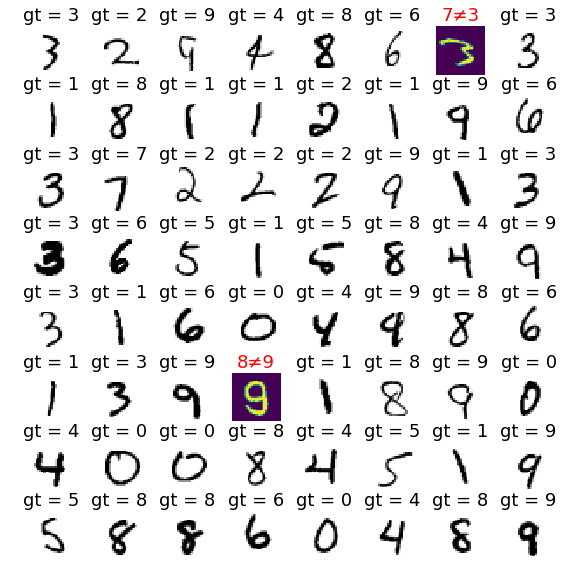

In [142]:
def shuffle(a, b, c):
    p = np.random.permutation(len(a))
    return a[p], b[p], c[p]

Y_test = np.argmax(y_test, axis=1) 
x, y_t, y_p = shuffle(x_test[:num],Y_test[:num],Y_pred)

plot_num = 64
plot_images(x[:plot_num], y_p[:plot_num], gt=y_t[:plot_num]) 